<a href="https://colab.research.google.com/github/SandraPuig/tfg-BA/blob/main/B2_An_dato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. AN√ÅLISIS DEL DATO - SEGMENTACI√ìN:**

### **B1 - PASOS INICIALES**

In [ ]:
#--------- CARGAR LIBRER√çAS ---------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import display, Markdown
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
# ----------- PRESENTACI√ìN -------------

# Cargar el dataset completo
df = pd.read_excel('/content/BBDD_E1_listo.xlsx')

# Columnas a excluir para clustering (identificadores no num√©ricos)
columnas_no_usar = ['municipio_cm', 'distrito_cm']

# Extraer columnas num√©ricas excluyendo identificadores
columnas_numericas = [col for col in df.columns if col not in columnas_no_usar and pd.api.types.is_numeric_dtype(df[col])]

# Variables estrat√©gicas definidas para segmentaci√≥n
variables_estrategicas = [
    'renta_media', 'pib_percapita', 'tasa_paro',
    'preciom2_compra', 'preciom2_alquiler', 'rentabilidad_bruta_calc',
    'viabilidad_financiera', 'indice_esfuerzo_compra', 'indice_presion_inmobiliaria',
    'transacciones_m2', 'tasa_transacciones_pob',
    'edad_media', 'grado_extranj', 'grado_envejecimiento', 'grado_juventud',
    'ratio_transporte', 'ratio_centros_salud', 'ratio_farmacias',
    'ratio_bibliotecas', 'ratio_centros_educativos',
    'densidad_poblacional', 'movilidad'
]

# Filtrar variables que est√°n en ambas listas (num√©ricas y estrat√©gicas)
variables_finales = [var for var in variables_estrategicas if var in columnas_numericas]

# Subset para clustering
X = df[variables_finales].copy()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Guardar identificadores para interpretaci√≥n
municipios = df['municipio_cm'].copy()
distritos = df['distrito_cm'].copy()

# Mostrar resumen
print(f"Variables usadas para clustering: {variables_finales}")
print(f"Shape de X escalado: {X_scaled.shape}")



Variables usadas para clustering: ['renta_media', 'pib_percapita', 'tasa_paro', 'preciom2_compra', 'preciom2_alquiler', 'rentabilidad_bruta_calc', 'viabilidad_financiera', 'indice_esfuerzo_compra', 'indice_presion_inmobiliaria', 'transacciones_m2', 'tasa_transacciones_pob', 'edad_media', 'grado_extranj', 'grado_envejecimiento', 'grado_juventud', 'ratio_transporte', 'ratio_centros_salud', 'ratio_farmacias', 'ratio_bibliotecas', 'ratio_centros_educativos', 'densidad_poblacional', 'movilidad']
Shape de X escalado: (200, 22)


### **B2. M√âTODO K-MEANS CLUSTERING**

### An√°lisis comparativo para distintos valores de k

k=2: Inercia (WCSS) = 3097.54, Silhouette = 0.342
k=3: Inercia (WCSS) = 2423.79, Silhouette = 0.270
k=4: Inercia (WCSS) = 1948.46, Silhouette = 0.300
k=5: Inercia (WCSS) = 1738.61, Silhouette = 0.277
k=6: Inercia (WCSS) = 1563.83, Silhouette = 0.284
k=7: Inercia (WCSS) = 1471.55, Silhouette = 0.228
k=8: Inercia (WCSS) = 1391.26, Silhouette = 0.237
k=9: Inercia (WCSS) = 1330.18, Silhouette = 0.238


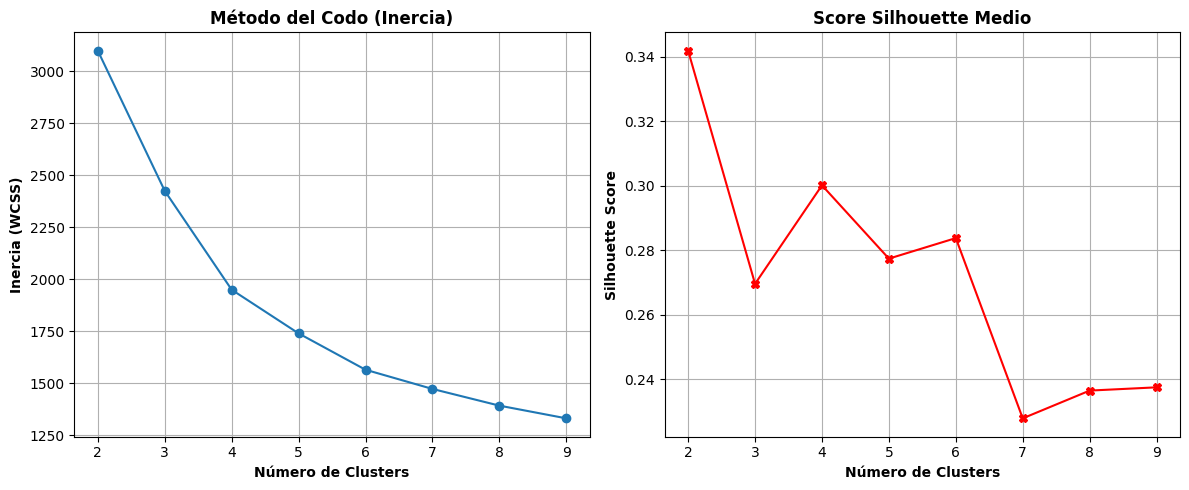

In [ ]:
#--------- AN√ÅLISIS PREVIO ---------
# Rango de valores de k a evaluar (n√∫mero de segmentos estrat√©gicos)
rango_k = range(2, 10)  # valores de k a evaluar
inercia = []            # WCSS: cohesi√≥n intra-cluster
silhouette_scores = [] # Silhouette: separaci√≥n entre clusters

for k in rango_k:
    modelo = KMeans(n_clusters=k, n_init=10, random_state=42)
    etiquetas = modelo.fit_predict(X_scaled)
    inercia.append(modelo.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, etiquetas))

# Mostrar resultados comparativos
display(Markdown("### An√°lisis comparativo para distintos valores de k"))
for k, w, s in zip(rango_k, inercia, silhouette_scores):
    print(f"k={k}: Inercia (WCSS) = {w:.2f}, Silhouette = {s:.3f}")


#--------- GR√ÅFICO K-MEANS ---------
plt.figure(figsize=(12, 5))

# Gr√°fico del m√©todo del codo
plt.subplot(1, 2, 1)
plt.plot(rango_k, inercia, marker='o')
plt.title("M√©todo del Codo (Inercia)", fontweight="bold")
plt.xlabel("N√∫mero de Clusters", fontweight="bold")
plt.ylabel("Inercia (WCSS)", fontweight="bold")
plt.grid(True)

# Gr√°fico del coeficiente silhouette
plt.subplot(1, 2, 2)
plt.plot(rango_k, silhouette_scores, marker='X', color='red')
plt.title("Score Silhouette Medio", fontweight="bold")
plt.xlabel("N√∫mero de Clusters", fontweight="bold")
plt.ylabel("Silhouette Score", fontweight="bold")
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Escoge el K √≥ptimo basado en an√°lisis anterior (ejemplo: K=4)
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)

# A√±adir etiquetas al DataFrame original
df['cluster_kmeans'] = labels_kmeans

# -------------------------------
# M√âTRICAS DE EVALUACI√ìN
# -------------------------------
sil_final = silhouette_score(X_scaled, labels_kmeans)
ch_final = calinski_harabasz_score(X_scaled, labels_kmeans)
db_final = davies_bouldin_score(X_scaled, labels_kmeans)

# -------------------------------
# IMPRESI√ìN DE RESULTADOS
# -------------------------------
print(f"\n\033[1mModelo final K-Means con k = {k_optimo}\033[0m")
print(f"\033[1mSilhouette Score:\033[0m {sil_final:.3f} (mayor = mejor separaci√≥n)")
print(f"\033[1mCalinski-Harabasz Index:\033[0m {ch_final:.2f} (mayor = mejor estructura)")
print(f"\033[1mDavies-Bouldin Index:\033[0m {db_final:.3f} (menor = mejor compacidad)")



Modelo final K-Means con k = 3
Silhouette Score: 0.259 (mayor = mejor separaci√≥n)
Calinski-Harabasz Index: 79.62 (mayor = mejor estructura)
Davies-Bouldin Index: 1.378 (menor = mejor compacidad)


<ipython-input-137-2094416781>:17: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


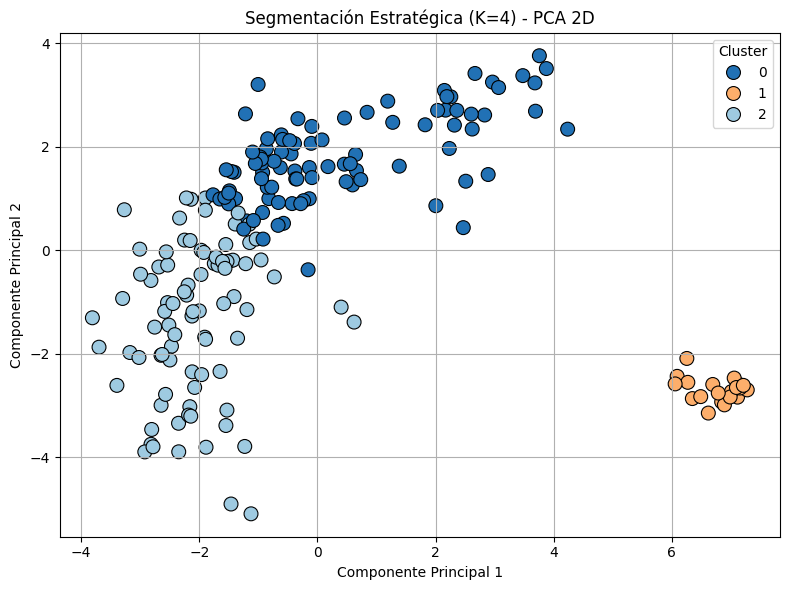

In [ ]:
# -------------------------------
#VISUALIZACI√ìN
# -------------------------------
# Reducci√≥n de dimensiones para visualizaci√≥n
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels_kmeans

# Colores suaves y diferenciados
colores_personalizados =  ['#2171B5', '#FDAE6B', '#9ECAE1', '#E34A33']  # Azul claro, naranja suave, azul medio, naranja claro

# Visualizaci√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette=colores_personalizados,
    s=100,
    edgecolor='black'
)
plt.title('Segmentaci√≥n Estrat√©gica (K=4) - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()



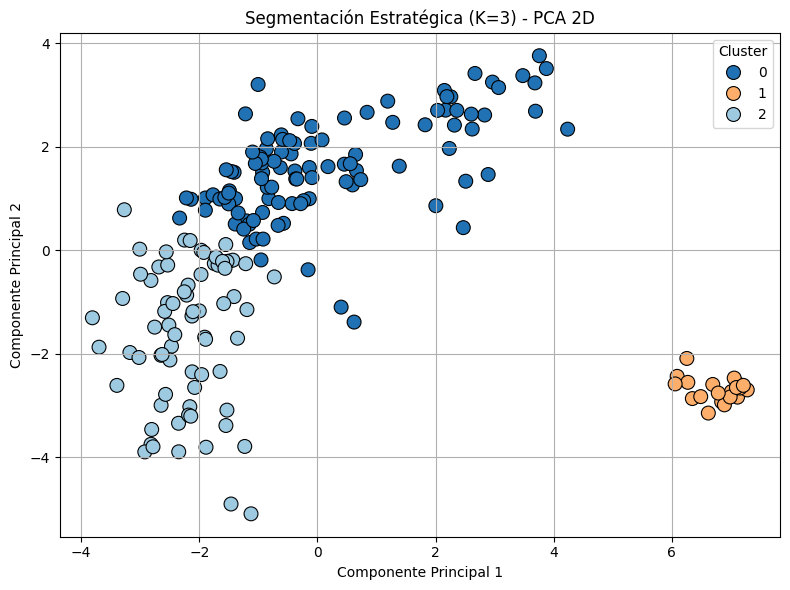

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Entrenar K-Means con k=3
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Reducci√≥n de dimensiones para visualizaci√≥n
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels_kmeans

# Colores suaves y diferenciados para 3 clusters
colores_personalizados = ['#2171B5', '#FDAE6B', '#9ECAE1']  # Azul, naranja suave, azul medio

# Visualizaci√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette=colores_personalizados,
    s=100,
    edgecolor='black'
)
plt.title('Segmentaci√≥n Estrat√©gica (K=3) - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Silhouette Score general
sil_score = silhouette_score(X_scaled, labels_kmeans)
ch_score = calinski_harabasz_score(X_scaled, labels_kmeans)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")


Silhouette Score: 0.270
Calinski-Harabasz Index: 80.311


In [ ]:
# Obtener media de las variables por cl√∫ster
descripcion_clusters = df.groupby('cluster_kmeans')[variables_estrategicas].mean()
print("Resumen de caracter√≠sticas promedio por cl√∫ster:")
display(descripcion_clusters)


Resumen de caracter√≠sticas promedio por cl√∫ster:


renta_media  pib_percapita  tasa_paro  preciom2_compra  \
cluster_kmeans                                                           
0                  0.390139       0.772629  -0.285080         0.342152   
1                  2.124666       2.391577   0.266037         1.591821   
2                 -0.312800      -0.071696   0.498751        -0.551774   

                preciom2_alquiler  rentabilidad_bruta_calc  \
cluster_kmeans                                               
0                        0.321290                -0.102129   
1                        1.793733                -0.158116   
2                       -0.301332                 0.494826   

                viabilidad_financiera  indice_esfuerzo_compra  \
cluster_kmeans                                                  
0                            0.255200                0.497841   
1                           -2.172192               -1.921454   
2                           -0.500800               -0.306187   

                indice_presion_inmobiliaria  transacciones_m2  ...  \
cluster_kmeans                                                 ...   
0                                  -0.23670          0.717171  ...   
1                                   1.95882          2.332438  ...   
2                                   0.31432         -0.147909  ...   

                grado_extranj  grado_envejecimiento  grado_juventud  \
cluster_kmeans                                                        
0                    0.075148              0.063097        0.218497   
1                    2.151752              2.262601        2.028614   
2                   -0.082230              0.323172       -0.614439   

                ratio_transporte  ratio_centros_salud  ratio_farmacias  \
cluster_kmeans                                                           
0                      -0.155366             0.822015        -0.064626   
1                       0.057511             0.860913         0.025822   
2                       1.161891             0.203488         0.795344   

                ratio_bibliotecas  ratio_centros_educativos  \
cluster_kmeans                                                
0                        0.638900                  0.138156   
1                       -0.011392                 -0.657272   
2                        0.145552                  0.466625   

                densidad_poblacional  movilidad  
cluster_kmeans                                   
0                           0.711725   0.626683  
1                           2.211434   1.511502  
2                          -0.164621  -0.087728  

[3 rows x 22 columns]

### **B3. DBSCAN MODEL**

In [ ]:
# T√©cnica para segmentaciones no lineales, con detecci√≥n autom√°tica de outliers y sin necesidad de fijar el n√∫mero de clusters a priori.

In [ ]:
#--------- PRUEBAS CON PAR√ÅMETROS ---------

# Probar diferentes combinaciones de eps y min_samples
eps_values = [0.5, 0.7, 1.0, 1.3, 1.6]
min_samples_values = [3, 5, 7]

resultados_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        modelo = DBSCAN(eps=eps, min_samples=min_samples)
        etiquetas = modelo.fit_predict(X_scaled)

        n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
        n_ruido = list(etiquetas).count(-1)

        if n_clusters > 1:
            silhouette = silhouette_score(X_scaled, etiquetas)
        else:
            silhouette = None

        resultados_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'outliers': n_ruido,
            'silhouette': silhouette
        })

# Mostrar resultados como tabla
resultados_df = pd.DataFrame(resultados_dbscan)
display(resultados_df.sort_values(by='silhouette', ascending=False))


eps  min_samples  n_clusters  outliers  silhouette
13  1.6            5           2       171    0.220231
14  1.6            7           2       173    0.219921
9   1.3            3           2       177    0.192638
10  1.3            5           2       179    0.173361
6   1.0            3           3       181    0.134595
12  1.6            3           6       153   -0.132864
0   0.5            3           1       196         NaN
1   0.5            5           0       200         NaN
2   0.5            7           0       200         NaN
3   0.7            3           1       194         NaN
4   0.7            5           1       195         NaN
5   0.7            7           0       200         NaN
7   1.0            5           1       191         NaN
8   1.0            7           1       193         NaN
11  1.3            7           1       185         NaN

In [ ]:
#--------- MODELO FINAL DBSCAN CON MEJORES PAR√ÅMETROS ---------
# Elegimos manualmente los mejores valores (aj√∫stalos seg√∫n lo que veas)
eps_final = 1.0
min_samples_final = 5

modelo_final = DBSCAN(eps=eps_final, min_samples=min_samples_final)
etiquetas_finales = modelo_final.fit_predict(X_scaled)

df['cluster_dbscan'] = etiquetas_finales

# Silhouette si es v√°lido
if len(set(etiquetas_finales)) - (1 if -1 in etiquetas_finales else 0) > 1:
    sil_dbscan = silhouette_score(X_scaled, etiquetas_finales)
    print(f"‚úÖ Silhouette final DBSCAN: {sil_dbscan:.3f}")
else:
    print("‚ö†Ô∏è No se puede calcular Silhouette: solo hay 1 cluster o todos son ruido.")

‚ö†Ô∏è No se puede calcular Silhouette: solo hay 1 cluster o todos son ruido.


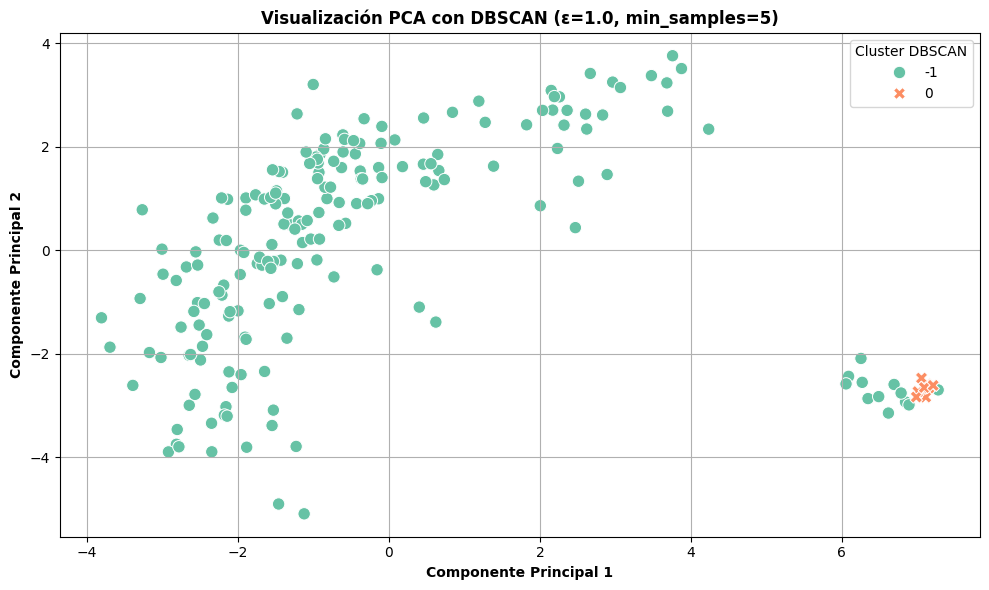

In [ ]:
#--------- VISUALIZACI√ìN PCA ---------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", n_colors=len(set(etiquetas_finales)))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=etiquetas_finales,
    palette=palette,
    style=etiquetas_finales,
    s=80
)

plt.title(f"Visualizaci√≥n PCA con DBSCAN (Œµ={eps_final}, min_samples={min_samples_final})", fontweight='bold')
plt.xlabel("Componente Principal 1", fontweight='bold')
plt.ylabel("Componente Principal 2", fontweight='bold')
plt.legend(title="Cluster DBSCAN", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### **B4. GAUSSIAN MIXTURE MODEL (GMM)**

k=2: BIC = 4605.39, Silhouette = 0.331
k=3: BIC = 2749.05, Silhouette = 0.253
k=4: BIC = 1227.38, Silhouette = 0.264
k=5: BIC = 2349.67, Silhouette = 0.249
k=6: BIC = 2659.28, Silhouette = 0.261
k=7: BIC = 2835.35, Silhouette = 0.221
k=8: BIC = 3394.01, Silhouette = 0.246
k=9: BIC = 2556.09, Silhouette = 0.240


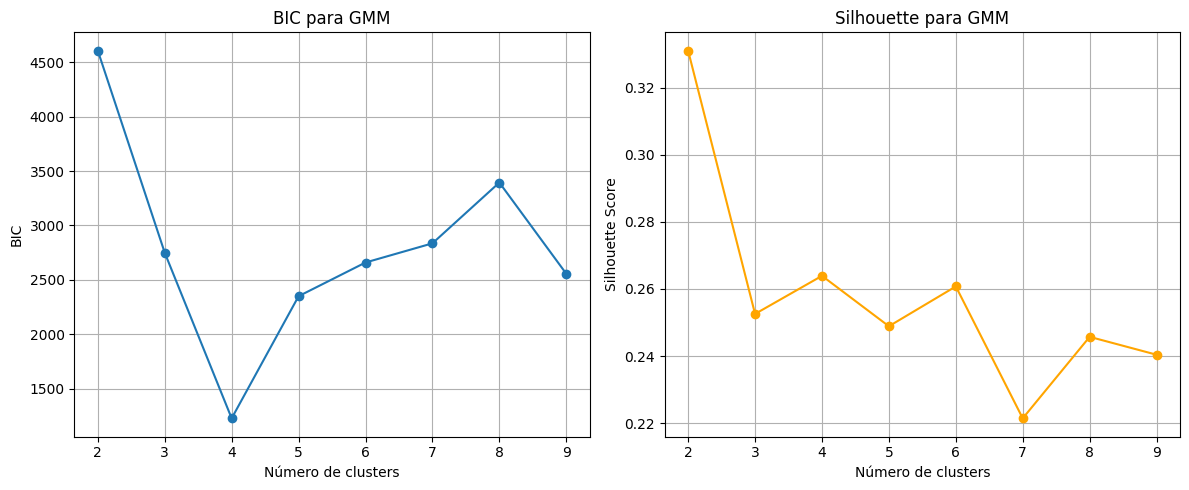

In [ ]:
# --------- An√°lisis comparativo ---------
rango_k = range(2, 10)
bic_scores = []
silhouette_scores = []

for k in rango_k:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))  # BIC penaliza complejidad modelo
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Mostrar resultados
for k, bic, sil in zip(rango_k, bic_scores, silhouette_scores):
    print(f"k={k}: BIC = {bic:.2f}, Silhouette = {sil:.3f}")


# ---------Visualizaci√≥n de m√©tricas BIC y Silhouette ---------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(rango_k, bic_scores, marker='o')
plt.title("BIC para GMM")
plt.xlabel("N√∫mero de clusters")
plt.ylabel("BIC")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(rango_k, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette para GMM")
plt.xlabel("N√∫mero de clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()



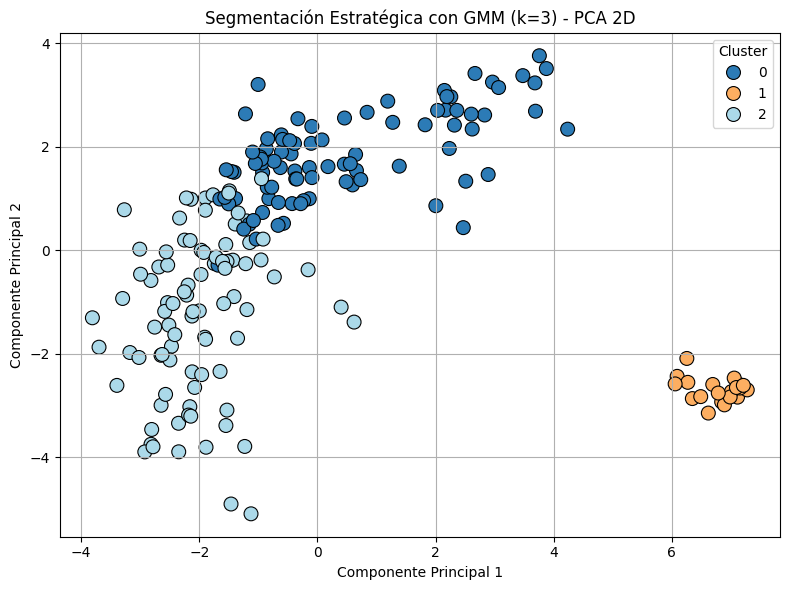

In [ ]:
# --------- Entrenar modelo GMM con k √≥ptimo ---------
k_optimo = 3  # Cambiar seg√∫n resultados
gmm_final = GaussianMixture(n_components=k_optimo, covariance_type='full', random_state=42)
gmm_final.fit(X_scaled)
labels_gmm = gmm_final.predict(X_scaled)



# --------- Visualizaci√≥n clusters con PCA ---------

# Reducci√≥n dimensional PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels_gmm

# Paleta personalizada para 3 clusters
colores_personalizados = ['#2C7BB6', '#FDAE61', '#ABD9E9']  # azul fuerte, naranja suave, azul claro

# Visualizaci√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette=colores_personalizados,
    s=100,
    edgecolor='black'
)
plt.title(f'Segmentaci√≥n Estrat√©gica con GMM (k={k_optimo}) - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

**Evaluaci√≥n del modelo GMM (3 clusters):**

Silhouette Score: 0.253
Calinski-Harabasz Index: 78.35
Davies-Bouldin Index: 1.397


**Tama√±os de los clusters:**

{np.int64(0): np.int64(89), np.int64(1): np.int64(21), np.int64(2): np.int64(90)}


**Promedio de variables estrat√©gicas por cluster:**

cluster                      Cluster 0  Cluster 1  Cluster 2
renta_media                       0.41       2.12      -0.30
pib_percapita                     0.80       2.39      -0.06
tasa_paro                        -0.30       0.27       0.48
preciom2_compra                   0.37       1.59      -0.54
preciom2_alquiler                 0.34       1.79      -0.30
rentabilidad_bruta_calc          -0.12      -0.16       0.49
viabilidad_financiera             0.27      -2.17      -0.48
indice_esfuerzo_compra            0.52      -1.92      -0.29
indice_presion_inmobiliaria      -0.25       1.96       0.30
transacciones_m2                  0.76       2.33      -0.15
tasa_transacciones_pob           -0.25       1.96       0.30
edad_media                       -0.33      -0.18       0.59
grado_extranj                     0.02       2.15      -0.02
grado_envejecimiento              0.10       2.26       0.27
grado_juventud                    0.19       2.03      -0.55
ratio_transporte                 -0.18       0.06       1.13
ratio_centros_salud               0.75       0.86       0.31
ratio_farmacias                  -0.09       0.03       0.78
ratio_bibliotecas                 0.59      -0.01       0.21
ratio_centros_educativos          0.05      -0.66       0.54
densidad_poblacional              0.75       2.21      -0.16
movilidad                         0.66       1.51      -0.09

**Ejemplos de municipios por cluster:**

**Cluster 0:** Ajalvir, Alamo, Alcal√° de Henares, Alcobendas, Alcorc√≥n

**Cluster 1:** Arganzuela, Barajas, Carabanchel, Centro, Chamart√≠n

**Cluster 2:** Acebeda, Alameda del Valle, Aldea del Fresno, Ambite, Anchuelo

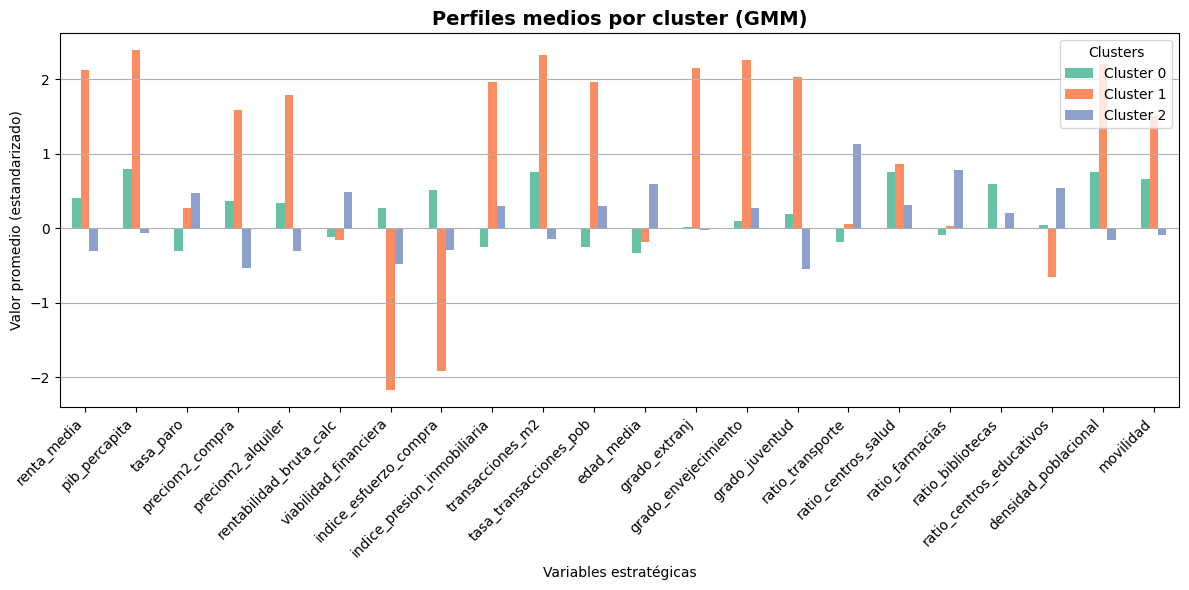

In [ ]:
# Entrenamos el modelo GMM con 3 componentes
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels_gmm = gmm.predict(X_scaled)

# Evaluamos calidad del clustering
sil = silhouette_score(X_scaled, labels_gmm)
ch = calinski_harabasz_score(X_scaled, labels_gmm)
db = davies_bouldin_score(X_scaled, labels_gmm)

display(Markdown("**Evaluaci√≥n del modelo GMM (3 clusters):**"))
print(f"Silhouette Score: {sil:.3f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")
print(f"Davies-Bouldin Index: {db:.3f}")

# Tama√±o de cada cluster
unique, counts = np.unique(labels_gmm, return_counts=True)
display(Markdown("**Tama√±os de los clusters:**"))
print(dict(zip(unique, counts)))


# -------- Perfil de cada cluster --------
# Creamos un DataFrame con los promedios de cada cluster
resumen_clusters = []
for i in range(3):
    cluster_i = df[labels_gmm == i]
    media = cluster_i[variables_estrategicas].mean().round(2).to_dict()
    media['cluster'] = f'Cluster {i}'
    resumen_clusters.append(media)

resumen_df = pd.DataFrame(resumen_clusters).set_index('cluster')

display(Markdown("**Promedio de variables estrat√©gicas por cluster:**"))
display(resumen_df.T)  # transpuesta: variables en filas, clusters en columnas

# Asociamos cada municipio con su cluster GMM
df['cluster_gmm'] = labels_gmm  # Aseg√∫rate de tener esta columna asignada
display(Markdown("**Ejemplos de municipios por cluster:**"))
for i in range(3):
    municipios_cluster = df[df['cluster_gmm'] == i]['municipio_cm'].head(5).tolist()
    display(Markdown(f"**Cluster {i}:** {', '.join(municipios_cluster)}"))

# Gr√°fico comparativo
# Elegimos una paleta de colores m√°s profesional
colors = sns.color_palette("Set2", n_colors=3)

# Gr√°fico mejorado
resumen_df.T.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title("Perfiles medios por cluster (GMM)", fontsize=14, weight='bold')
plt.ylabel("Valor promedio (estandarizado)")
plt.xlabel("Variables estrat√©gicas")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Clusters", loc='upper right')
plt.show()

In [ ]:
# --------- M√©tricas de Evaluaci√≥n K-means vs GMM ---------

# Valores de k para comparar
k_optimo = 3  # Cambia seg√∫n lo que hayas decidido

# Entrenar K-Means
kmeans = KMeans(n_clusters=k_optimo, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Entrenar GMM
gmm = GaussianMixture(n_components=k_optimo, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels_gmm = gmm.predict(X_scaled)

# Funci√≥n para calcular m√©tricas
def calcular_metricas(X, labels):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return sil, ch, db

# Calcular m√©tricas para K-Means
sil_k, ch_k, db_k = calcular_metricas(X_scaled, labels_kmeans)

# Calcular m√©tricas para GMM
sil_gmm, ch_gmm, db_gmm = calcular_metricas(X_scaled, labels_gmm)


# Crear DataFrame con resultados (suponiendo que las variables ya existen)
resultados = pd.DataFrame({
    'Modelo': ['K-Means', 'Gaussian Mixture Model (GMM)'],
    'Silhouette Score (‚Üë Mejor)': [sil_k, sil_gmm],
    'Calinski-Harabasz Index (‚Üë Mejor)': [ch_k, ch_gmm],
    'Davies-Bouldin Index (‚Üì Mejor)': [db_k, db_gmm]
})

# Mostrar tabla con formato y 3 decimales
display(
    resultados.style
    .background_gradient(cmap='Blues')
    .format("{:.3f}", subset=['Silhouette Score (‚Üë Mejor)', 'Calinski-Harabasz Index (‚Üë Mejor)', 'Davies-Bouldin Index (‚Üì Mejor)'])
)



### **B4. MODELO SELF ORGANIZINF MAPS (SOM)**

In [ ]:
#--------- Instalar MiniSom  ---------
!pip install minisom


Entrenando SOM...
Entrenamiento finalizado.


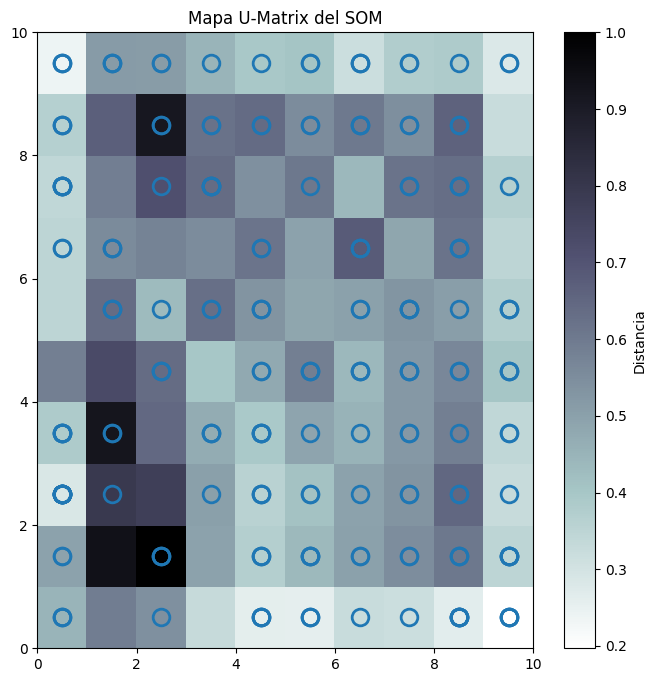

In [ ]:
#--------- entrenar y visualizar un SOM  ---------
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
import pandas as pd

# Asumiendo que X_scaled es tu dataset escalado con variables num√©ricas relevantes

# Par√°metros del SOM
map_width = 10  # ancho del mapa (puedes ajustar)
map_height = 10  # alto del mapa (puedes ajustar)
input_len = X_scaled.shape[1]  # n√∫mero de variables

# Inicializar SOM
som = MiniSom(x=map_width, y=map_height, input_len=input_len, sigma=1.0, learning_rate=0.5, random_seed=42)

# Inicializaci√≥n de pesos y entrenamiento
som.random_weights_init(X_scaled)
print("Entrenando SOM...")
som.train_random(data=X_scaled, num_iteration=1000)
print("Entrenamiento finalizado.")

# Visualizaci√≥n del mapa de distancia (U-Matrix)
plt.figure(figsize=(8, 8))
plt.title("Mapa U-Matrix del SOM")
plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distancias entre neuronas
plt.colorbar(label='Distancia')

# Opcional: a√±adir los puntos proyectados en el mapa para visualizaci√≥n
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # distintos marcadores para clusters si los tienes
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

# Si tienes etiquetas o clusters, puedes asignar colores/marcadores
# Si no, simplemente marca todos los puntos igual

for i, x in enumerate(X_scaled):
    w = som.winner(x)  # neurona ganadora para el dato i
    plt.plot(w[0]+0.5, w[1]+0.5, markers[0], markerfacecolor='None', markeredgecolor=colors[0], markersize=12, markeredgewidth=2)

plt.show()


Resultados m√©tricas para segmentaci√≥n basada en SOM con k=3:
Silhouette Score: 0.281
Calinski-Harabasz Index: 79.386
Davies-Bouldin Index: 1.336


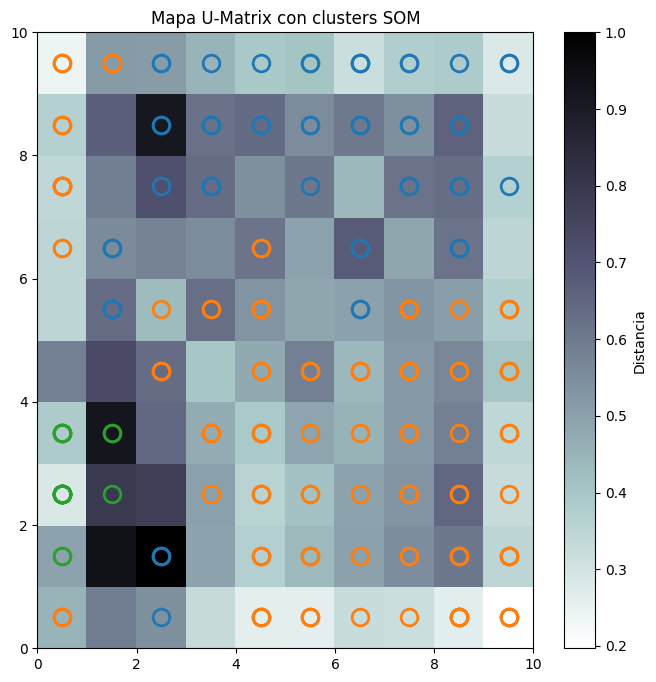

In [ ]:
#--------- M√âTRICAS PARA VALIDAR SOM ---------

# Par√°metros SOM
map_width, map_height = 10, 10
input_len = X_scaled.shape[1]

# Crear y entrenar SOM
som = MiniSom(map_width, map_height, input_len, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)

# Obtener pesos de las neuronas
weights = som.get_weights().reshape(map_width * map_height, input_len)

# Clusterizar neuronas con K-Means
k_clusters = 3  # N√∫mero de clusters deseados para segmentaci√≥n
kmeans_som = KMeans(n_clusters=k_clusters, random_state=42)
kmeans_som.fit(weights)
neuron_cluster_labels = kmeans_som.labels_

# Asignar a cada dato el cluster de su neurona ganadora
win_map = np.array([som.winner(x) for x in X_scaled])
win_map_indices = win_map[:,0] * map_height + win_map[:,1]
data_cluster_labels = neuron_cluster_labels[win_map_indices]

# Evaluar m√©tricas cl√°sicas para la segmentaci√≥n SOM
sil = silhouette_score(X_scaled, data_cluster_labels)
ch = calinski_harabasz_score(X_scaled, data_cluster_labels)
db = davies_bouldin_score(X_scaled, data_cluster_labels)

print(f"Resultados m√©tricas para segmentaci√≥n basada en SOM con k={k_clusters}:")
print(f"Silhouette Score: {sil:.3f}")
print(f"Calinski-Harabasz Index: {ch:.3f}")
print(f"Davies-Bouldin Index: {db:.3f}")

# Visualizaci√≥n U-Matrix + clusters
plt.figure(figsize=(8,8))
plt.title("Mapa U-Matrix con clusters SOM")

# Mapa de distancias
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distancia')

# Colores para clusters
colors = ['C0', 'C1', 'C2', 'C3', 'C4'][:k_clusters]

# Marcar cada dato con color seg√∫n cluster
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    cluster_idx = neuron_cluster_labels[w[0]*map_height + w[1]]
    plt.plot(w[0]+0.5, w[1]+0.5, 'o', markerfacecolor='None',
             markeredgecolor=colors[cluster_idx], markersize=12, markeredgewidth=2)

plt.show()


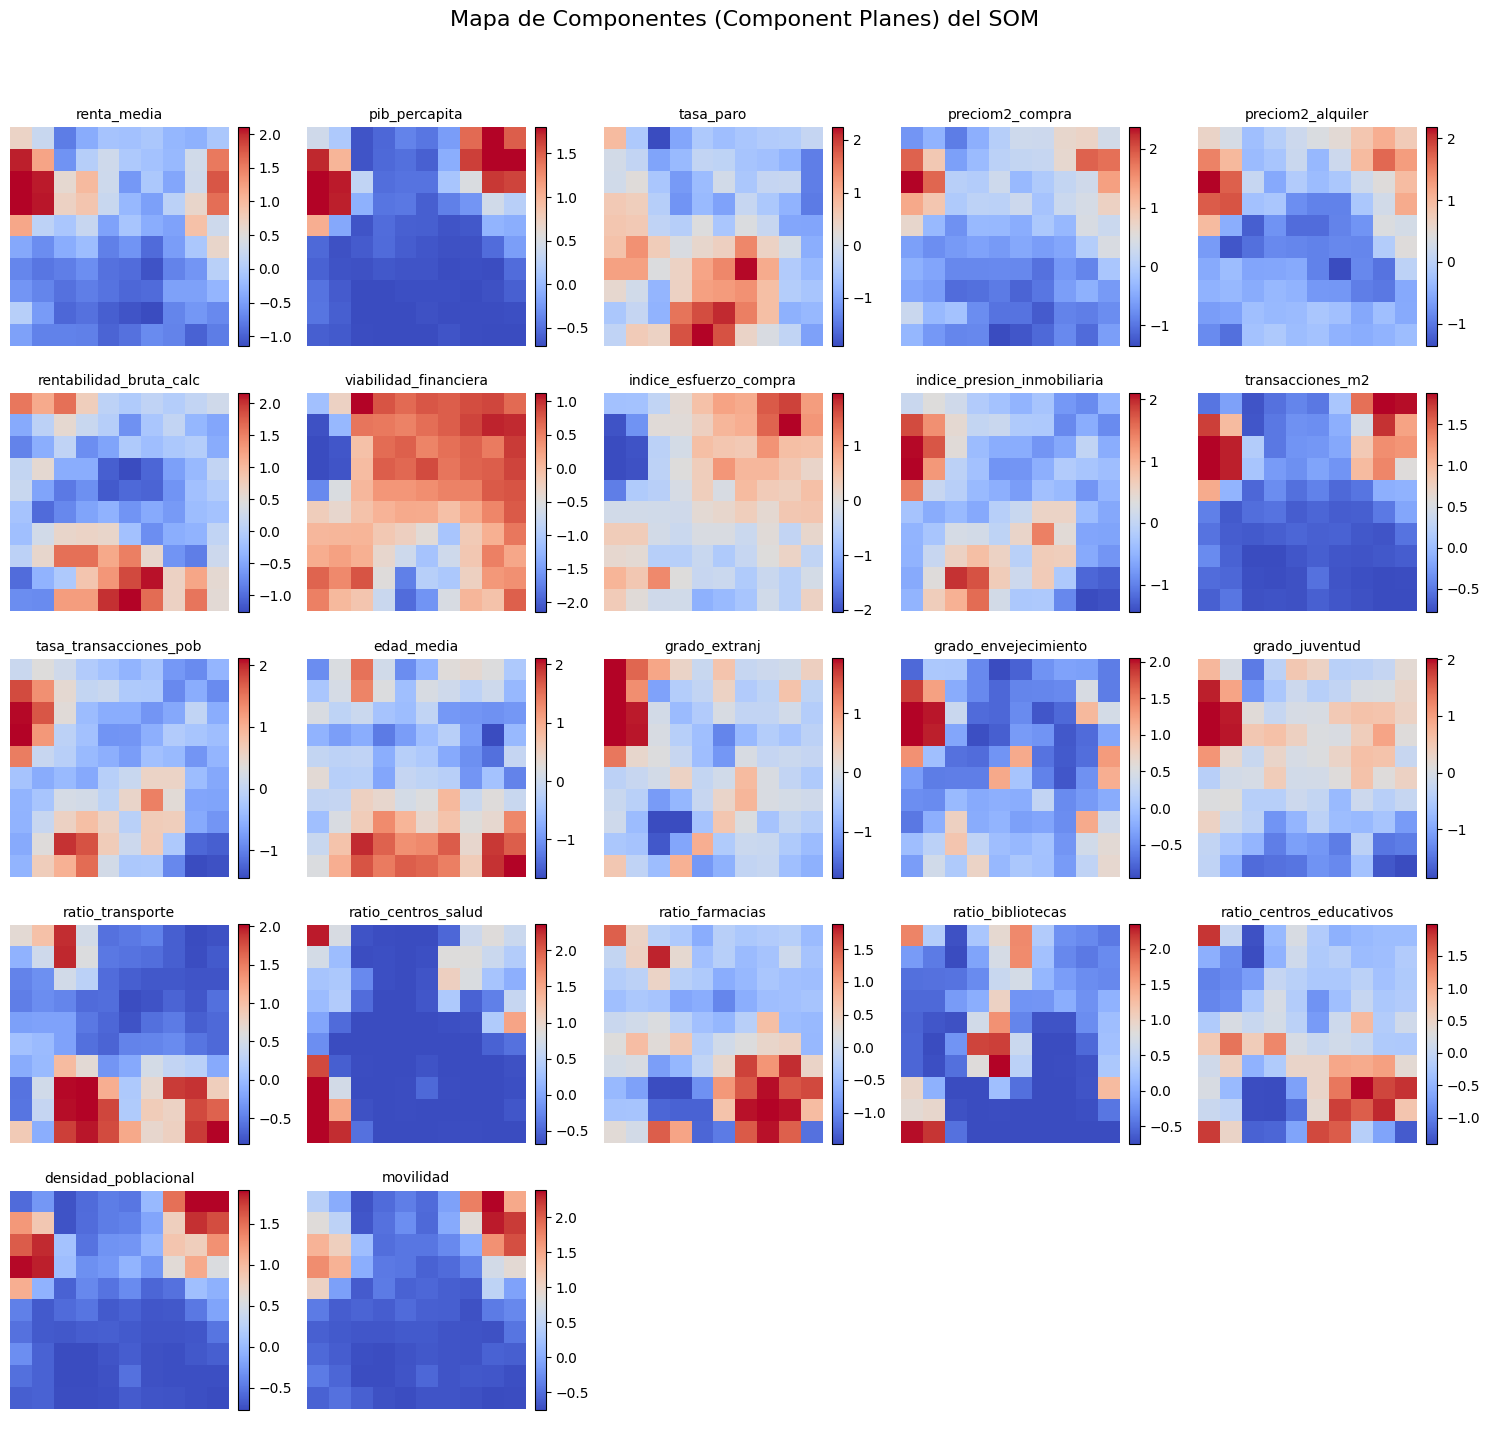

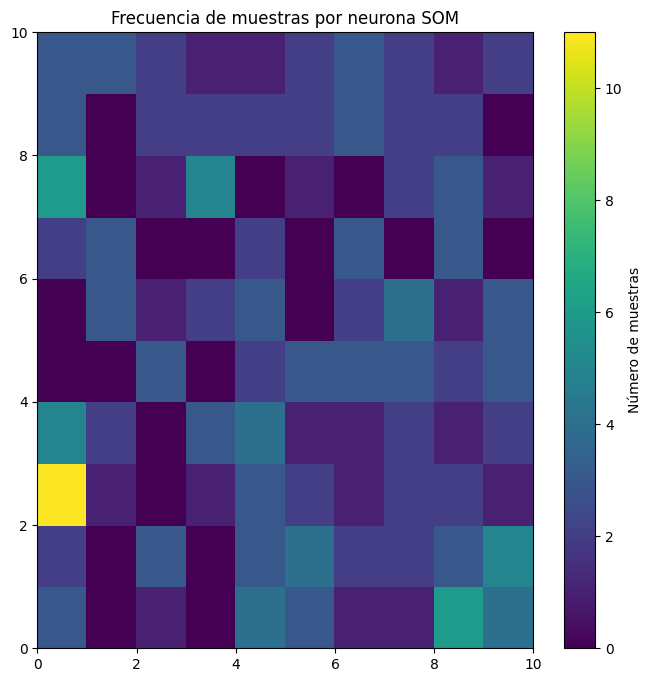

In [ ]:
# Mapa de Componentes para cada variable
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))  # Ajusta filas y columnas seg√∫n variables
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < input_len:
        component = som.get_weights()[:, :, i]
        im = ax.imshow(component.T, cmap='coolwarm')
        ax.set_title(variables_finales[i], fontsize=10)
        ax.axis('off')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    else:
        ax.axis('off')

plt.suptitle('Mapa de Componentes (Component Planes) del SOM', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mapa de frecuencia de datos por neurona
from collections import Counter

win_map = [som.winner(x) for x in X_scaled]
freq = Counter(win_map)

freq_map = np.zeros((map_width, map_height))
for (x,y), count in freq.items():
    freq_map[x,y] = count

plt.figure(figsize=(8,8))
plt.title('Frecuencia de muestras por neurona SOM')
plt.pcolor(freq_map.T, cmap='viridis')
plt.colorbar(label='N√∫mero de muestras')
plt.show()


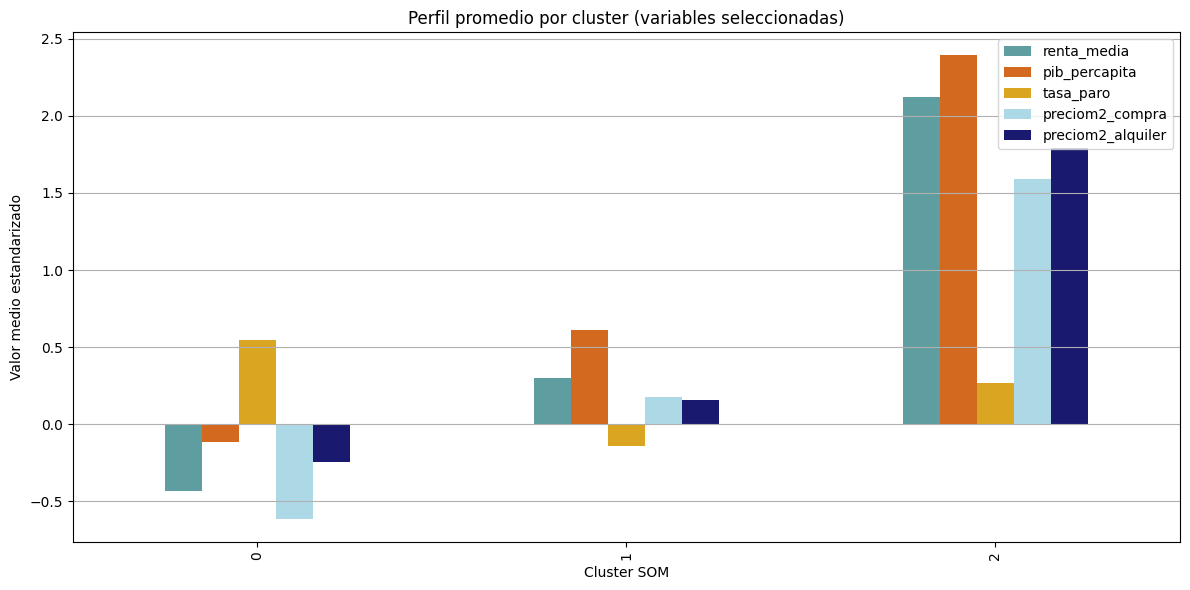

In [ ]:
import matplotlib.pyplot as plt

# Convertir etiquetas SOM a columna en dataframe original
df_som = df.copy()
df_som['cluster_som'] = data_cluster_labels

# Calcular media por cluster
perfil_clusters = df_som.groupby('cluster_som')[variables_finales].mean()

# Mostrar tabla
display(perfil_clusters.style.background_gradient(cmap='Blues'))



# Paleta de colores personalizada para las variables
colores_personalizados = ['#5F9EA0', '#D2691E', '#DAA520', '#ADD8E6', '#191970']  # Azul, naranja, verde, rojo, morado

# Graficar perfil promedio por cluster con colores personalizados
perfil_clusters[variables_finales[:5]].plot(kind='bar', figsize=(12,6), color=colores_personalizados)

plt.title('Perfil promedio por cluster (variables seleccionadas)')
plt.ylabel('Valor medio estandarizado')
plt.xlabel('Cluster SOM')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



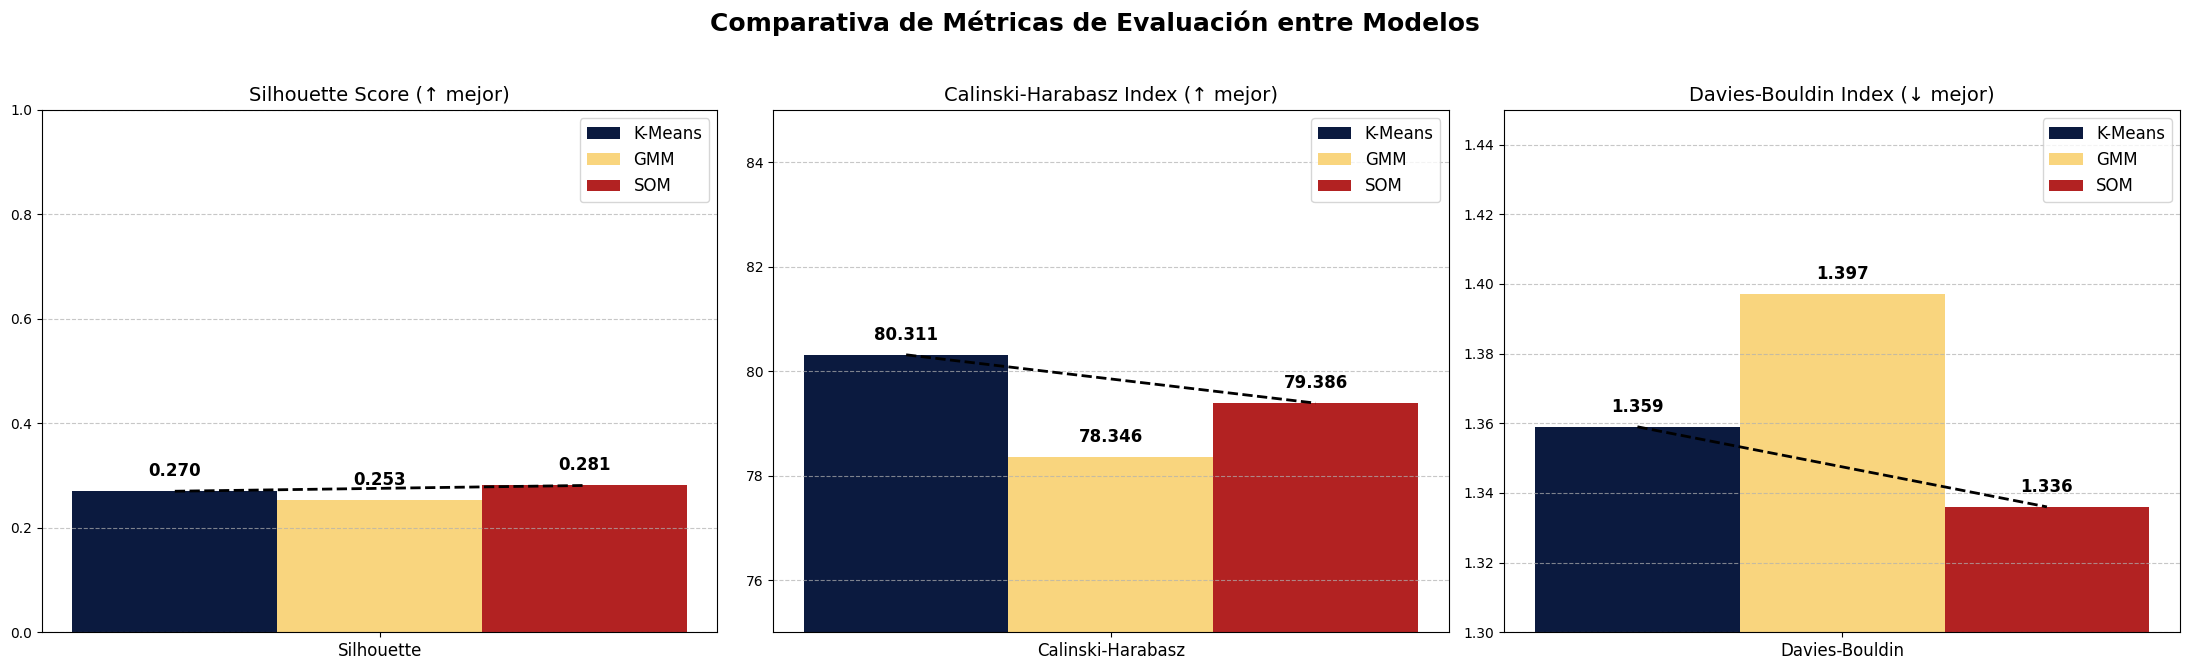

In [ ]:
# --------- histograma M√©tricas de Evaluaci√≥n K-means vs GMM ---------

# M√©tricas y valores actualizados con SOM
metricas = ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin']
valores_kmeans = [0.270, 80.311, 1.359]
valores_gmm = [0.253, 78.346, 1.397]
valores_som = [0.281, 79.386, 1.336]

x = np.arange(len(metricas))  # posiciones para cada m√©trica
width = 0.2  # ancho de las barras

fig, axs = plt.subplots(1, 3, figsize=(22, 7))

def autolabel(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 8),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# Silhouette Score (mayor es mejor)
rects1 = axs[0].bar(x[0] - width, valores_kmeans[0], width, label='K-Means', color='#0B1A3F')
rects2 = axs[0].bar(x[0], valores_gmm[0], width, label='GMM', color='#F9D57E')
rects3 = axs[0].bar(x[0] + width, valores_som[0], width, label='SOM', color='#B22222')  # rojo cereza
axs[0].set_title('Silhouette Score (‚Üë mejor)', fontsize=14)
axs[0].set_xticks([x[0]])
axs[0].set_xticklabels(['Silhouette'], fontsize=12)
axs[0].set_ylim(0, 1)
axs[0].plot([x[0] - width, x[0] + width], [valores_kmeans[0], valores_som[0]], color='black', linestyle='--', linewidth=2)
autolabel(axs[0], rects1)
autolabel(axs[0], rects2)
autolabel(axs[0], rects3)

# Calinski-Harabasz (mayor es mejor)
rects1 = axs[1].bar(x[1] - width, valores_kmeans[1], width, label='K-Means', color='#0B1A3F')
rects2 = axs[1].bar(x[1], valores_gmm[1], width, label='GMM', color='#F9D57E')
rects3 = axs[1].bar(x[1] + width, valores_som[1], width, label='SOM', color='#B22222')  # rojo cereza
axs[1].set_title('Calinski-Harabasz Index (‚Üë mejor)', fontsize=14)
axs[1].set_xticks([x[1]])
axs[1].set_xticklabels(['Calinski-Harabasz'], fontsize=12)
axs[1].set_ylim(75, 85)
axs[1].plot([x[1] - width, x[1] + width], [valores_kmeans[1], valores_som[1]], color='black', linestyle='--', linewidth=2)
autolabel(axs[1], rects1)
autolabel(axs[1], rects2)
autolabel(axs[1], rects3)

# Davies-Bouldin (menor es mejor)
rects1 = axs[2].bar(x[2] - width, valores_kmeans[2], width, label='K-Means', color='#0B1A3F')
rects2 = axs[2].bar(x[2], valores_gmm[2], width, label='GMM', color='#F9D57E')
rects3 = axs[2].bar(x[2] + width, valores_som[2], width, label='SOM', color='#B22222')  # rojo cereza
axs[2].set_title('Davies-Bouldin Index (‚Üì mejor)', fontsize=14)
axs[2].set_xticks([x[2]])
axs[2].set_xticklabels(['Davies-Bouldin'], fontsize=12)
axs[2].set_ylim(1.3, 1.45)
axs[2].plot([x[2] - width, x[2] + width], [valores_kmeans[2], valores_som[2]], color='black', linestyle='--', linewidth=2)
autolabel(axs[2], rects1)
autolabel(axs[2], rects2)
autolabel(axs[2], rects3)

for ax in axs:
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Comparativa de M√©tricas de Evaluaci√≥n entre Modelos', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### **B4. MODELO DE SCORING INMOBILIARIO**

   k  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  2    0.694324         668.561590        0.444825
1  3    0.607253         835.460927        0.489768
2  4    0.593179        1098.667580        0.471989
3  5    0.576179        1439.672855        0.481510
4  6    0.577787        1508.385077        0.459173


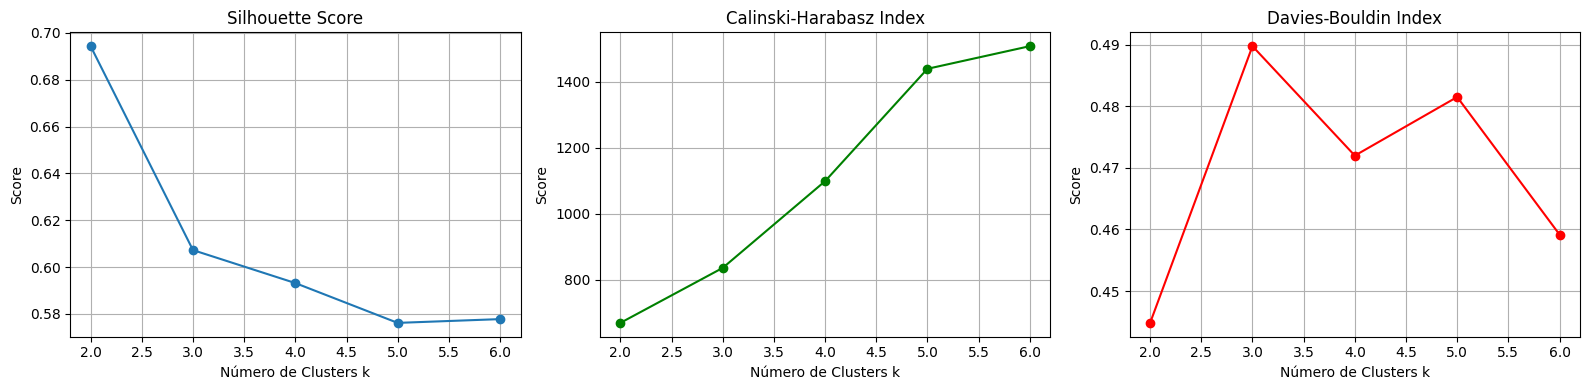

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar base datos
df = pd.read_excel('/content/BBDD_E1_listo.xlsx')

# Selecci√≥n variables para scoring (ajustar seg√∫n disponibilidad)
variables_scoring = [
    'renta_media', 'pib_percapita', 'tasa_paro',
    'preciom2_compra', 'preciom2_alquiler'
]

# Eliminar filas con datos nulos en variables seleccionadas
df = df.dropna(subset=variables_scoring)

# Normalizar variables entre 0 y 1
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[variables_scoring] = scaler.fit_transform(df[variables_scoring])

# Crear scoring ponderado (ajustar pesos seg√∫n criterio)
pesos = {
    'renta_media': 0.25,
    'pib_percapita': 0.25,
    'tasa_paro': -0.20,          # negativo: paro alto resta atractivo
    'preciom2_compra': 0.15,
    'preciom2_alquiler': 0.15
}

df_scaled['score'] = 0
for var, peso in pesos.items():
    df_scaled['score'] += df_scaled[var] * peso

# An√°lisis para determinar n√∫mero √≥ptimo de clusters en el scoring
rango_k = range(2, 7)  # puedes ampliar el rango

sil_scores = []
ch_scores = []
db_scores = []

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled[['score']])
    sil_scores.append(silhouette_score(df_scaled[['score']], labels))
    ch_scores.append(calinski_harabasz_score(df_scaled[['score']], labels))
    db_scores.append(davies_bouldin_score(df_scaled[['score']], labels))

# Mostrar resultados
results_df = pd.DataFrame({
    'k': list(rango_k),
    'Silhouette': sil_scores,
    'Calinski-Harabasz': ch_scores,
    'Davies-Bouldin': db_scores
})

print(results_df)

# Graficar las m√©tricas para decidir k
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(rango_k, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('N√∫mero de Clusters k')
plt.ylabel('Score')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(rango_k, ch_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Index')
plt.xlabel('N√∫mero de Clusters k')
plt.ylabel('Score')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(rango_k, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('N√∫mero de Clusters k')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()


segmento
Alto     108
Bajo      55
Medio     37
Name: count, dtype: int64


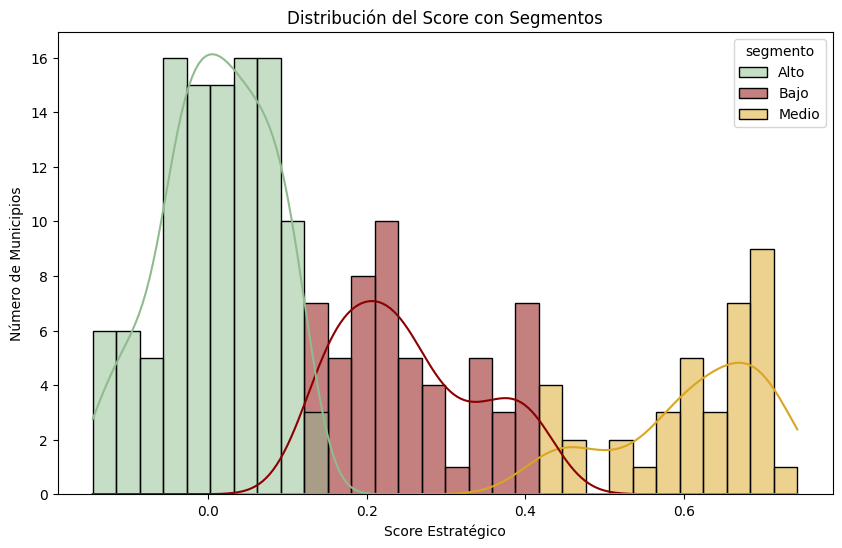

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir paleta personalizada 3 tonos azules (claro, medio, oscuro)
paleta_azules = ['#8FBC8F', '#8B0000', '#DAA520']

k_optimo = 3  # cambiar seg√∫n resultados an√°lisis anterior

kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
df_scaled['segmento'] = kmeans_final.fit_predict(df_scaled[['score']])

# Mapear etiquetas num√©ricas a categor√≠as
segment_labels = {0: 'Bajo', 1: 'Medio', 2: 'Alto'}
df_scaled['segmento'] = df_scaled['segmento'].map(segment_labels)

# Mostrar distribuci√≥n por segmento
print(df_scaled['segmento'].value_counts())

# Visualizaci√≥n con paleta personalizada
plt.figure(figsize=(10,6))
sns.histplot(data=df_scaled, x='score', hue='segmento', bins=30, kde=True, palette=paleta_azules)
plt.title('Distribuci√≥n del Score con Segmentos')
plt.xlabel('Score Estrat√©gico')
plt.ylabel('N√∫mero de Municipios')
plt.show()



In [ ]:
from sklearn.cluster import KMeans

# Supongamos que tu dataframe con scores se llama df_scaled y contiene la columna 'score'

k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)

# Clustering sobre la columna 'score' (debe ser un DataFrame 2D)
df_scaled['segmento'] = kmeans.fit_predict(df_scaled[['score']])

# Mapear etiquetas num√©ricas a categor√≠as
segment_labels = {0: 'Bajo', 1: 'Medio', 2: 'Alto'}
df_scaled['segmento'] = df_scaled['segmento'].map(segment_labels)


In [ ]:
for segmento in ['Alto', 'Medio', 'Bajo']:
    print(f"\nMunicipios en segmento '{segmento}':")
    municipios = df_scaled[df_scaled['segmento'] == segmento].sort_values(by='score', ascending=False)['municipio_cm'].tolist()
    print(municipios)



Municipios en segmento 'Alto':
['Molinos', 'Becerril de la Sierra', 'Cercedilla', 'Serranillos del Valle', 'Molar', 'Torrej√≥n de Velasco', 'Quijorna', 'Miraflores de la Sierra', 'Cabanillas de la Sierra', 'Torres de la Alameda', 'Valdetorres de Jarama', 'Horcajuelo de la Sierra', 'Rascafr√≠a', 'Berzosa del Lozoya', 'Patones', 'Campo Real', 'Braojos', 'Acebeda', 'Pinilla del Valle', 'Batres', 'San Mart√≠n de la Vega', 'Guadalix de la Sierra', 'Casarrubuelos', 'Torremocha de Jarama', 'Alamo', 'Madarcos', 'Cabrera ', 'Torrelaguna', 'Montejo de la Sierra', 'Nuevo Bazt√°n', 'Gascones', 'Buitrago del Lozoya', 'Puentes Viejas', 'Puebla de la Sierra', 'Fresno de Torote', 'Colmenar del Arroyo', 'Morata de Taju√±a', 'Santos de la Humosa ', 'Colmenar de Oreja', 'Lozoya', 'Santorcaz', 'Valdemanco', 'Anchuelo', 'Villar del Olmo', 'Bustarviejo', 'Berrueco', 'Serna del Monte', 'Vell√≥n ', 'Redue√±a', 'Garganta de los Montes', 'Lozoyuela-Navas-Sieteiglesias', 'San Mart√≠n de Valdeiglesias', 'Pi√±uec

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carga el shapefile de municipios de Madrid
gdf_madrid = gpd.read_file('/content/recintos_municipales_inspire_peninbal_etrs89.shp')

# Funci√≥n para limpiar nombres y facilitar matching
def limpiar_nombre(nombre):
    if isinstance(nombre, str):
        nombre = nombre.lower().strip()
        nombre = nombre.replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u')
        nombre = nombre.replace('√±','n')
        return nombre
    else:
        return nombre

# Aplicar limpieza de nombres al GeoDataFrame
gdf_madrid['nombre_limpio'] = gdf_madrid['NOMBRE'].apply(limpiar_nombre)

# Listas limpias para segmentaci√≥n (min√∫sculas, sin tildes ni espacios al inicio/final)
municipios_alto = [m.lower().strip().replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u').replace('√±','n') for m in [
    'Molinos', 'Becerril de la Sierra', 'Cercedilla', 'Serranillos del Valle', 'Molar', 'Torrej√≥n de Velasco', 'Quijorna', 'Miraflores de la Sierra',
    'Cabanillas de la Sierra', 'Torres de la Alameda', 'Valdetorres de Jarama', 'Horcajuelo de la Sierra', 'Rascafr√≠a', 'Berzosa del Lozoya', 'Patones',
    'Campo Real', 'Braojos', 'Acebeda', 'Pinilla del Valle', 'Batres', 'San Mart√≠n de la Vega', 'Guadalix de la Sierra', 'Casarrubuelos', 'Torremocha de Jarama',
    'Alamo', 'Madarcos', 'Cabrera ', 'Torrelaguna', 'Montejo de la Sierra', 'Nuevo Bazt√°n', 'Gascones', 'Buitrago del Lozoya', 'Puentes Viejas',
    'Puebla de la Sierra', 'Fresno de Torote', 'Colmenar del Arroyo', 'Morata de Taju√±a', 'Santos de la Humosa ', 'Colmenar de Oreja', 'Lozoya',
    'Santorcaz', 'Valdemanco', 'Anchuelo', 'Villar del Olmo', 'Bustarviejo', 'Berrueco', 'Serna del Monte', 'Vell√≥n ', 'Redue√±a', 'Garganta de los Montes',
    'Lozoyuela-Navas-Sieteiglesias', 'San Mart√≠n de Valdeiglesias', 'Pi√±uecar-Gandullas', 'Pozuelo del Rey', 'Villavieja del Lozoya', 'Valdilecha',
    'Robledo de Chavela', 'Villa del Prado', 'Navalagamella', 'Valdeavero', 'Villamantilla', 'Gargantilla del Lozoya y Pinilla de Buitrago', 'Corpa',
    'Valdepi√©lagos', 'Chapiner√≠a', 'Aldea del Fresno', 'Pezuela de las Torres', 'Valverde de Alcal√°', 'Olmeda de las Fuentes', 'Navas del Rey', 'Somosierra',
    'Villamanta', 'Pr√°dena del Rinc√≥n', 'Villarejo de Salvan√©s', 'Perales de Taju√±a', 'Navalafuente', 'Belmonte de Tajo', 'Canencia', 'Rozas de Puerto Real',
    'Tielmes', 'Navarredonda y San Mam√©s', 'Chinch√≥n', 'Ribatejada', 'Caraba√±a', 'Cervera de Buitrago', 'Estremera', 'Horcajo de la Sierra-Aoslos',
    'Fresnedillas de la Oliva', 'Alameda del Valle', 'Titulcia', 'Robregordo', 'Villaconejos', 'Fuentidue√±a de Tajo', 'Valdelaguna', 'Santa Mar√≠a de la Alameda',
    'Brea de Tajo', 'Hiruela', 'Zarzalejo', 'Robledillo de la Jara', 'Cadalso de los Vidrios', 'Valdaracete', 'Cenicientos', 'Ambite', 'Atazar',
    'Pelayos de la Presa', 'Orusco de Taju√±a', 'Valdemaqueda', 'Villamanrique de Tajo'
]]

municipios_medio = [m.lower().strip().replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u').replace('√±','n') for m in [
    'Pozuelo de Alarc√≥n', 'Chamart√≠n', 'Salamanca', 'Moncloa-Aravaca', 'Majadahonda', 'Chamber√≠', 'Retiro', 'Arganzuela', 'Tetu√°n', 'Centro',
    'Rozas de Madrid ', 'Hortaleza', 'Fuencarral-El Pardo', 'Ciudad Lineal', 'Tres Cantos', 'Barajas', 'Boadilla del Monte', 'Moratalaz',
    'San Blas-Canillejas', 'Latina', 'Vic√°lvaro', 'Alcobendas', 'Villa de Vallecas', 'Usera', 'Carabanchel', 'Madrid', 'Villaverde',
    'Puente de Vallecas', 'San Sebasti√°n de los Reyes', 'Villaviciosa de Od√≥n', 'Rivas-Vaciamadrid', 'Torrelodones', 'Getafe', 'Alcorc√≥n',
    'Pinto', 'Coslada', 'San Fernando de Henares'
]]

municipios_bajo = [m.lower().strip().replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u').replace('√±','n') for m in [
    'Valdemoro', 'Torrej√≥n de Ardoz', 'M√≥stoles', 'Alcal√° de Henares', 'Legan√©s', 'Paracuellos de Jarama', 'Arganda del Rey', 'Fuenlabrada',
    'Aranjuez', 'Villanueva del Pardillo', 'Collado Villalba', 'Algete', 'Arroyomolinos', 'Villanueva de la Ca√±ada', 'Parla', 'Colmenar Viejo',
    'San Agust√≠n del Guadalix', 'Cobe√±a', 'Hoyo de Manzanares', 'Gri√±√≥n', 'Galapagar', 'Ajalvir', 'Moralzarzal', 'Venturada', 'Daganzo de Arriba',
    'Valdeolmos-Alalpardo', 'Humanes de Madrid', 'Meco', 'Soto del Real', 'Brunete', 'San Lorenzo de El Escorial', 'Alpedrete', 'Villalbilla',
    'Escorial', 'Navalcarnero', 'Guadarrama', 'Ciempozuelos', 'Fuente el Saz de Jarama', 'Valdemorillo', 'Boalo', 'Loeches', 'Colmenarejo',
    'Velilla de San Antonio', 'Mejorada del Campo', 'Sevilla la Nueva', 'Moraleja de Enmedio', 'Navacerrada', 'Collado Mediano', 'Villanueva de Perales',
    'Camarma de Esteruelas', 'Pedrezuela', 'Torrej√≥n de la Calzada', 'Manzanares el Real', 'Talamanca de Jarama', 'Cubas de la Sagra'
]]

# Funci√≥n para asignar segmento seg√∫n municipio
def asignar_segmento(municipio):
    if municipio in municipios_alto:
        return 'Alto'
    elif municipio in municipios_medio:
        return 'Medio'
    elif municipio in municipios_bajo:
        return 'Bajo'
    else:
        return 'No asignado'

# Aplicar asignaci√≥n
gdf_madrid['segmento'] = gdf_madrid['nombre_limpio'].apply(asignar_segmento)

# Paleta colores personalizada
paleta_azules = {'Bajo': '#c6dbef', 'Medio': '#6baed6', 'Alto': '#08306b', 'No asignado': '#f0f0f0'}

# A√±adir columna color
gdf_madrid['color'] = gdf_madrid['segmento'].map(paleta_azules)

# Graficar
fig, ax = plt.subplots(figsize=(12, 12))
gdf_madrid.plot(ax=ax, color=gdf_madrid['color'], edgecolor='black', linewidth=0.3)

ax.set_title('Segmentaci√≥n Estrat√©gica por Municipio - Comunidad de Madrid', fontsize=16)
ax.axis('off')

# Crear leyenda personalizada
leyenda = [mpatches.Patch(color=color, label=label) for label, color in paleta_azules.items() if label != 'No asignado']
ax.legend(handles=leyenda, title='Segmento de Inversi√≥n', loc='lower left')

plt.tight_layout()
plt.show()


KeyError: 'NOMBRE'

In [ ]:
print(gdf_madrid.head()[['NOMBRE']])  # o cambia 'NOMBRE' por el nombre correcto


KeyError: "None of [Index(['NOMBRE'], dtype='object')] are in the [columns]"

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Cargar shapefile si no est√° cargado ya
gdf_madrid = gpd.read_file('/content/recintos_municipales_inspire_peninbal_etrs89.shp')

# Limpieza de nombres para facilitar matching
def limpiar_nombre(nombre):
    if isinstance(nombre, str):
        nombre = nombre.lower().strip()
        nombre = nombre.replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u')
        nombre = nombre.replace('√±','n')
        return nombre
    else:
        return nombre

gdf_madrid['nombre_limpio'] = gdf_madrid['NOMBRE'].apply(limpiar_nombre)

# Define listas limpias (aplica la misma limpieza a tus listas)
municipios_alto = ['molinos', 'becerril de la sierra', 'cercedilla', 'serranillos del valle', 'molar',
                  'torrejon de velasco', 'quijorna', 'miraflores de la sierra', 'cabanillas de la sierra',
                  # ... sigue con todas tus entradas convertidas a minusculas y sin tildes
                 ]

municipios_medio = ['pozuelo de alarcon', 'chamartin', 'salamanca', 'moncloa-aravaca', 'majadahonda',
                   # ...
                  ]

municipios_bajo = ['valdemoro', 'torrejon de ardoz', 'mostoles', 'alcala de henares', 'leganes',
                  # ...
                 ]

# Crear una funci√≥n para asignar segmento seg√∫n el municipio
def asignar_segmento(municipio):
    if municipio in municipios_alto:
        return 'Alto'
    elif municipio in municipios_medio:
        return 'Medio'
    elif municipio in municipios_bajo:
        return 'Bajo'
    else:
        return 'No asignado'

# Aplicar asignaci√≥n
gdf_madrid['segmento'] = gdf_madrid['nombre_limpio'].apply(asignar_segmento)

# Paleta colores personalizada
paleta_azules = {'Bajo': '#c6dbef', 'Medio': '#6baed6', 'Alto': '#08306b', 'No asignado': '#f0f0f0'}

# A√±adir columna color
gdf_madrid['color'] = gdf_madrid['segmento'].map(paleta_azules)

# Graficar
fig, ax = plt.subplots(figsize=(12, 12))
gdf_madrid.plot(ax=ax, color=gdf_madrid['color'], edgecolor='black', linewidth=0.3)

ax.set_title('Segmentaci√≥n Estrat√©gica por Municipio - Comunidad de Madrid', fontsize=16)
ax.axis('off')

# Crear leyenda personalizada
leyenda = [mpatches.Patch(color=color, label=label) for label, color in paleta_azules.items() if label != 'No asignado']
ax.legend(handles=leyenda, title='Segmento de Inversi√≥n', loc='lower left')

plt.tight_layout()
plt.show()


KeyError: 'NOMBRE'

In [ ]:
# Gr√°fico de barras con colores de sem√°foro
top_20 = df[['municipio_cm', 'score_inversion', 'clasificacion']].sort_values(by='score_inversion', ascending=False).head(20)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_20,
    x='score_inversion',
    y='municipio_cm',
    hue='clasificacion',
    dodge=False,
    palette={'üî¥ Bajo': '#E74C3C', 'üü° Medio': '#F1C40F', 'üü¢ Alto': '#27AE60'}
)
plt.title("üîç Municipios con mayor potencial de inversi√≥n inmobiliaria", fontweight='bold')
plt.xlabel("√çndice Estrat√©gico de Inversi√≥n", fontweight='bold')
plt.ylabel("Municipio", fontweight='bold')
plt.legend(title='Clasificaci√≥n tipo sem√°foro')
plt.tight_layout()
plt.show()


KeyError: "['score_inversion', 'clasificacion'] not in index"

### **CON EL MAPA**

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo .shp (aseg√∫rate que el nombre coincide exactamente)
ruta = "/content/recintos_municipales_inspire_peninbal_etrs89.shp"

# Cargar shapefile completo
gdf = gpd.read_file(ruta)

# Visualiza las columnas disponibles (opcional para saber c√≥mo filtrar)
print(gdf.columns)

# Ver algunas filas para identificar la columna del c√≥digo de provincia
print(gdf.head())


Index(['INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT',
       'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'],
      dtype='object')
                  INSPIREID COUNTRY  \
0  ES.IGN.BDDAE.34040707901      ES   
1  ES.IGN.BDDAE.34040707902      ES   
2  ES.IGN.BDDAE.34164848057      ES   
3  ES.IGN.BDDAE.34164848058      ES   
4  ES.IGN.BDDAE.34164848059      ES   

                                              NATLEV NATLEVNAME      NATCODE  \
0  https://inspire.ec.europa.eu/codelist/Administ...  Municipio  34040707901   
1  https://inspire.ec.europa.eu/codelist/Administ...  Municipio  34040707902   
2  https://inspire.ec.europa.eu/codelist/Administ...  Municipio  34164848057   
3  https://inspire.ec.europa.eu/codelist/Administ...  Municipio  34164848058   
4  https://inspire.ec.europa.eu/codelist/Administ...  Municipio  34164848059   

          NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
0           Ariany     ES5    ES53   ES532   
1  Es Migjorn Gran     ES5    ES53   ES

In [ ]:
# Verifica valores √∫nicos primero (opcional)
print(gdf['CODNUT3'].unique())

# Filtrar por CODNUT3 correspondiente a Madrid
gdf_madrid = gdf[gdf['CODNUT3'] == 'ES300']

# Confirmamos
print(f"Total municipios seleccionados: {len(gdf_madrid)}")
gdf_madrid.head()

['ES532' 'ES533' 'ES213' 'ES220' 'ES211' 'ES230' 'ES113' 'ES130' 'ES114'
 'ES432' 'ES212' 'ES300' 'ES112' 'ES620' 'ES611' 'ES612' 'ES613' 'ES614'
 'ES615' 'ES616' 'ES617' 'ES618' 'ES241' 'ES242' 'ES243' 'ES120' 'ES531'
 'ES431' 'ES411' 'ES412' 'ES413' 'ES414' 'ES415' 'ES111' 'ES416' 'ES417'
 'ES418' 'ES419' 'ES421' 'ES422' 'ES630' 'ES640' None 'ES423' 'ES424'
 'ES425' 'ES511' 'ES512' 'ES513' 'ES514' 'ES521' 'ES522' 'ES523']
Total municipios seleccionados: 181


INSPIREID COUNTRY  \
183  ES.IGN.BDDAE.34132828049      ES   
184  ES.IGN.BDDAE.34132828050      ES   
185  ES.IGN.BDDAE.34132828051      ES   
186  ES.IGN.BDDAE.34132828052      ES   
187  ES.IGN.BDDAE.34132828053      ES   

                                                NATLEV NATLEVNAME  \
183  https://inspire.ec.europa.eu/codelist/Administ...  Municipio   
184  https://inspire.ec.europa.eu/codelist/Administ...  Municipio   
185  https://inspire.ec.europa.eu/codelist/Administ...  Municipio   
186  https://inspire.ec.europa.eu/codelist/Administ...  Municipio   
187  https://inspire.ec.europa.eu/codelist/Administ...  Municipio   

         NATCODE           NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
183  34132828049            Coslada     ES3    ES30   ES300   
184  34132828050  Cubas de la Sagra     ES3    ES30   ES300   
185  34132828051         Chapiner√≠a     ES3    ES30   ES300   
186  34132828052           Chinch√≥n     ES3    ES30   ES300   
187  34132828053  Daganzo de Arriba     ES3    ES30   ES300   

                                              geometry  
183  POLYGON ((-3.53119 40.42008, -3.53023 40.41471...  
184  POLYGON ((-3.87632 40.19122, -3.87623 40.19123...  
185  POLYGON ((-4.23555 40.39329, -4.23396 40.39376...  
186  POLYGON ((-3.58093 40.09899, -3.58075 40.10069...  
187  POLYGON ((-3.48098 40.56217, -3.48022 40.56407...

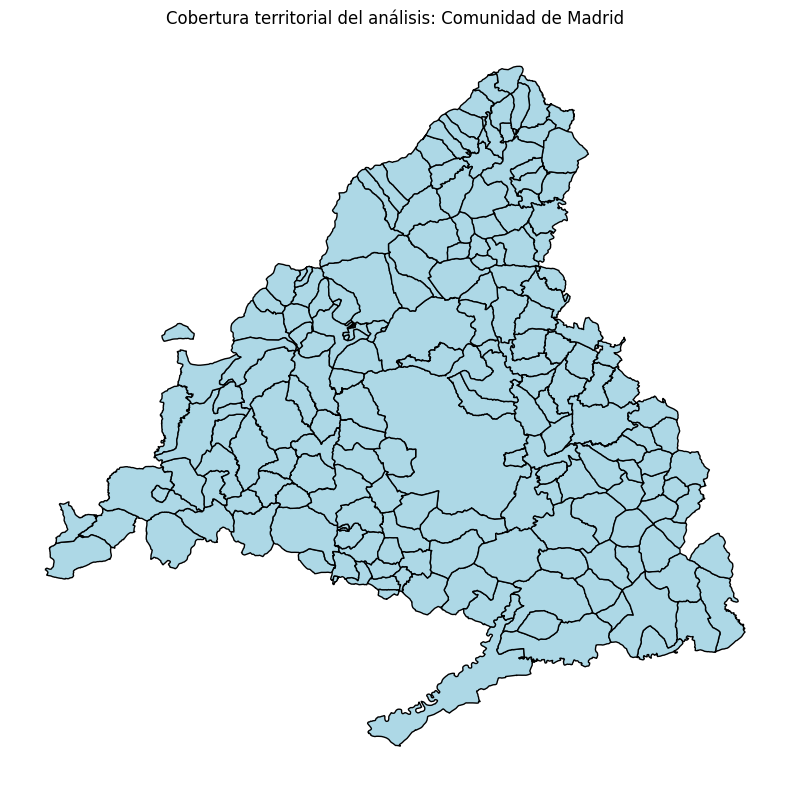

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
gdf_madrid.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Cobertura territorial del an√°lisis: Comunidad de Madrid', fontsize=12)
ax.set_aspect('auto')  # evita errores de aspecto
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def limpiar_nombre(nombre):
    if isinstance(nombre, str):
        nombre = nombre.lower().strip()
        nombre = nombre.replace('√°','a').replace('√©','e').replace('√≠','i').replace('√≥','o').replace('√∫','u')
        nombre = nombre.replace('√±','n')
        return nombre
    else:
        return nombre

df_scaled['municipio_limpio'] = df_scaled['municipio_cm'].apply(limpiar_nombre)
gdf_madrid['nombre_limpio'] = gdf_madrid['NOMBRE'].apply(limpiar_nombre)


KeyError: 'NOMBRE'

In [ ]:
from sklearn.cluster import KMeans

k_optimo = 3  # o el valor que hayas decidido
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
df_scaled['segmento'] = kmeans_final.fit_predict(df_scaled[['score']])

# Mapear n√∫meros a etiquetas
segment_labels = {0: 'Bajo', 1: 'Medio', 2: 'Alto'}
df_scaled['segmento'] = df_scaled['segmento'].map(segment_labels)


In [ ]:
# Revisar nombres de columnas para confirmar las usadas en el merge
print(df_scaled.columns)
print(df_scaled[['municipio_cm', 'segmento']].head())

print("Columnas GeoDataFrame:", gdf_madrid.columns)
print("Columnas DataFrame:", df_scaled.columns)

# Limpiar y homogeneizar nombres en GeoDataFrame y DataFrame para evitar fallos en el merge
def limpiar_nombre(nombre):
    if isinstance(nombre, str):
        nombre = nombre.lower().strip()           # minusculas y quitar espacios
        nombre = nombre.replace('√°', 'a').replace('√©', 'e').replace('√≠', 'i').replace('√≥', 'o').replace('√∫', 'u')  # quitar tildes
        nombre = nombre.replace('√±', 'n')          # reemplazar √± por n si quieres (opcional)
        return nombre
    else:
        return nombre

gdf_madrid['nombre_limpio'] = gdf_madrid['NOMBRE'].apply(limpiar_nombre)
df_scaled['municipio_limpio'] = df_scaled['municipio_cm'].apply(limpiar_nombre)

# Ahora hacemos el merge con las columnas limpias
gdf_madrid = gdf_madrid.merge(df_scaled[['municipio_limpio', 'segmento']], left_on='nombre_limpio', right_on='municipio_limpio', how='left')

# Verificar que el merge se ha realizado bien
print(gdf_madrid[['NOMBRE', 'segmento']].head())

# Definir paleta de colores tonos azul
paleta_azules = {'Bajo': '#c6dbef', 'Medio': '#6baed6', 'Alto': '#08306b'}
gdf_madrid['color'] = gdf_madrid['segmento'].map(paleta_azules)

# Graficar el mapa con colores por segmento
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 8))
gdf_madrid.plot(ax=ax, color=gdf_madrid['color'], edgecolor='black')

ax.set_title('Segmentaci√≥n Estrat√©gica de la Comunidad de Madrid', fontsize=12)
ax.set_aspect('auto')
ax.axis('off')

leyenda = [mpatches.Patch(color=color, label=label) for label, color in paleta_azules.items()]
ax.legend(handles=leyenda, title='Segmento de Inversi√≥n', loc='lower left')

plt.tight_layout()
plt.show()


Index(['renta_media', 'pib_percapita', 'tasa_paro', 'preciom2_compra',
       'preciom2_alquiler', 'rentabilidad_bruta_calc', 'viabilidad_financiera',
       'indice_esfuerzo_compra', 'indice_presion_inmobiliaria',
       'transacciones_m2', 'tasa_transacciones_pob', 'edad_media',
       'grado_extranj', 'grado_envejecimiento', 'grado_juventud',
       'ratio_transporte', 'ratio_centros_salud', 'ratio_farmacias',
       'ratio_bibliotecas', 'ratio_centros_educativos', 'densidad_poblacional',
       'movilidad', 'municipio_cm', 'distrito_cm', 'score', 'segmento'],
      dtype='object')
        municipio_cm segmento
0            Acebeda     Alto
1            Ajalvir     Bajo
2  Alameda del Valle     Alto
3              Alamo     Alto
4  Alcal√° de Henares     Bajo
Columnas GeoDataFrame: Index(['INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT',
       'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'],
      dtype='object')
Columnas DataFrame: Index(['renta_media', 'pib_perc

KeyError: 'NOMBRE'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Asumiendo que ya hiciste merge para unir datos al GeoDataFrame
# Si no, haz merge antes (por ejemplo):
# gdf_madrid = gdf_madrid.merge(df_scaled[['municipio_cm', 'segmento']], left_on='NOMBRE', right_on='municipio_cm', how='left')

# Definir paleta personalizada de tonos azules para los segmentos
paleta_azules = {'Bajo': '#c6dbef', 'Medio': '#6baed6', 'Alto': '#08306b'}

# Crear columna de colores basada en segmento
gdf_madrid['color'] = gdf_madrid['segmento'].map(paleta_azules)

fig, ax = plt.subplots(figsize=(8, 8))
# Dibujar municipios con color seg√∫n segmento
gdf_madrid.plot(ax=ax, color=gdf_madrid['color'], edgecolor='black')

ax.set_title('Segmentaci√≥n Estrat√©gica de la Comunidad de Madrid', fontsize=12)
ax.set_aspect('auto')
ax.axis('off')

# Crear leyenda manual
import matplotlib.patches as mpatches
leyenda = [mpatches.Patch(color=color, label=label) for label, color in paleta_azules.items()]
ax.legend(handles=leyenda, title='Segmento de Inversi√≥n', loc='lower left')

plt.tight_layout()
plt.show()


KeyError: 'segmento'